In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train, y_train) , (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

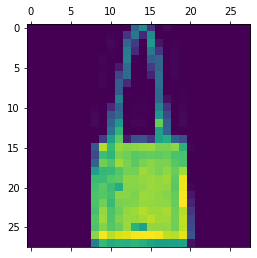

In [5]:
plt.matshow(x_train[200])

In [6]:
y_train[200]

8

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)
x_test_flatten.shape

(10000, 784)

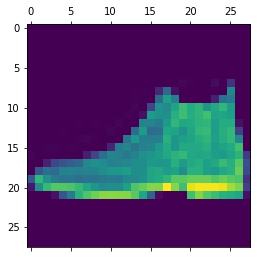

In [10]:
plt.matshow(x_test[0])

In [13]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), #hidden layer
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer = 'Nadam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6356 - accuracy: 0.7811
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3724 - accuracy: 0.8665
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3349 - accuracy: 0.8806
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3074 - accuracy: 0.8874
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2862 - accuracy: 0.8953


In [14]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3445 - accuracy: 0.8738


[0.3444861173629761, 0.8737999796867371]

In [15]:
y_predicted = model.predict(x_test_flatten)
y_predicted[0]

array([1.0109246e-03, 7.5235680e-06, 6.9958267e-05, 3.8359804e-06,
       3.4081936e-04, 7.8371853e-01, 5.3754449e-04, 8.4927022e-01,
       2.2418261e-02, 9.9714607e-01], dtype=float32)

In [16]:
np.argmax(y_predicted[0])

9

In [17]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [18]:
cmap = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cmap

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[864,   3,   8,  19,   5,   0,  94,   1,   6,   0],
       [  0, 975,   0,  17,   4,   0,   2,   0,   2,   0],
       [ 14,   0, 783,  12, 118,   0,  70,   0,   3,   0],
       [ 40,  11,  10, 871,  42,   0,  22,   0,   4,   0],
       [  0,   1,  85,  29, 846,   0,  37,   0,   2,   0],
       [  0,   0,   0,   1,   0, 921,   0,  45,   3,  30],
       [179,   3,  86,  26, 107,   0, 586,   0,  13,   0],
       [  0,   0,   0,   0,   0,   7,   0, 964,   1,  28],
       [  5,   0,   1,   3,   5,   2,   5,   5, 974,   0],
       [  0,   0,   0,   0,   0,   3,   1,  42,   0, 954]])>

Text(69.0, 0.5, 'Truth')

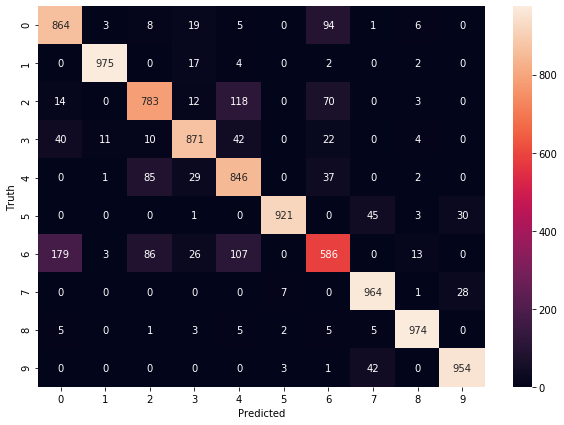

In [19]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cmap, annot = True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")